<h1>Course 9 Capstone. Final Project.</h1>
<h3>By Michael Rodriguez Gamboa.</h3>
<h4>September, 2020</h4>

<p>This capstone project course will give you a taste of what data scientists go through in real life when working with data.</p>

<h2>Classification of the severity of traffic accidents in Seatle. Data Analysis and Predictive Model.</h2>

In [336]:
#week 1
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats
print("All the libraries had been imported...")
print("Hello, Capstone Project Course!")

All the libraries had been imported...
Hello, Capstone Project Course!


<h1>1) Introduction</h1>

<i>#week 2.</i>
<h4>Defining the problem:</h4>
<p><strong>Business Understanding: </strong>Can we predict the severity of a car accident before it happen? Well, with enough data, data analysis and Machine learning it's posible. When all the work done, we could predict the risk level and the consecuences involved in a simple ride around the city. This will help to the transit police, the pertinent autorities and the drivers to prevent accidents when dangerous conditions arise.
</p>

<p><strong>Data understanding: </strong>For this research I'm going to use the Dataset from the weekly transit collision report of Seattle. These Data contain all the relevant information on transit accidents from 2004 to 2020. I'm going to use these Data to build a clasification K-means algorithm for a predictive model with machine learning. 
</p>

<h1>2) Data Exploration</h1>

<h4>2.1 Reading Data</h4>

In [337]:
#read data
path = "Dataset/Data-Collisions.csv"
df = pd.read_csv(path)
df.head()

c:\users\casa\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [338]:
#descriptive analysis
print("Shape:", df.shape)

Shape: (194673, 38)


<h4>2.2 Refining the dataframe</h4>

In [339]:
#drop unneeded columns, like descriptions already with code counterpart. 
df.drop(['OBJECTID', 'LOCATION', 'INCKEY', 'COLDETKEY','INTKEY', 'STATUS', 'REPORTNO', 'SEVERITYDESC', 'SEVERITYCODE.1', 'COLLISIONTYPE','INCDTTM','SDOT_COLCODE','SDOT_COLDESC','ST_COLDESC','SDOTCOLNUM', 'ST_COLCODE', 'CROSSWALKKEY', 'SEGLANEKEY'], axis=1, inplace=True)

#for now I'm not going to use X, Y. Maybe in the end to make a choropleth map of Seattle.
df.drop(['X', 'Y'], axis= 1, inplace= True)

#new df
print("Dimensions:", df.shape)
df.head(3)

Dimensions: (194673, 18)


,SEVERITYCODE,ADDRTYPE,EXCEPTRSNCODE,EXCEPTRSNDESC,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,2,Intersection,,NaN,2,0,0,2,2013/03/27 00:00:00+00,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,NaN,NaN,N
1,1,Block,NaN,NaN,2,0,0,2,2006/12/20 00:00:00+00,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,N
2,1,Block,NaN,NaN,4,0,0,3,2004/11/18 00:00:00+00,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN,NaN,N


<h4>2.3 Dealing with null values</h4>

In [340]:
#null data exploration

#Unknown values to NaN
for column in df.columns.values:
    df[column].replace('Unknown', np.nan, inplace = True)
print('Unknown values had been converted to NaN.')

#Other values to NaN
for column in df.columns.values:
    df[column].replace('Other', np.nan, inplace = True)
print('\"Other\" values had been converted to NaN.')
    
print("\nTotal of null values over 65% grouped by column:")
nulls_df = df.isnull().sum()
nullValues_list = df.isnull().sum().tolist()
nullIndex_list = nulls_df.index.values.tolist()
i = 0
for name in nullIndex_list:
    if(nullValues_list[i]>df.shape[0]/1.53):
        print(name, nullValues_list[i])
    i = i + 1 

Unknown values had been converted to NaN.
"Other" values had been converted to NaN.

Total of null values over 65% grouped by column:
EXCEPTRSNDESC 189035
INATTENTIONIND 164868
PEDROWNOTGRNT 190006
SPEEDING 185340


In [341]:
#dropping columns with null values over 65% of the total of rows
df.drop(['EXCEPTRSNCODE', 'EXCEPTRSNDESC','INATTENTIONIND', 'PEDROWNOTGRNT', 'SPEEDING'], axis= 1, inplace=True)
print(df.shape)
df.head(3)

(194673, 13)


,SEVERITYCODE,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,2,Intersection,2,0,0,2,2013/03/27 00:00:00+00,At Intersection (intersection related),N,Overcast,Wet,Daylight,N
1,1,Block,2,0,0,2,2006/12/20 00:00:00+00,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,N
2,1,Block,4,0,0,3,2004/11/18 00:00:00+00,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,N


In [342]:
#checking for null values in columns.
print(df.isnull().sum())

#Storing all the columns names with at least 1 null value.
columnsWithNullValues_list = []
for columnName in df.columns.values:
    if(df[columnName].isnull().sum()>0):
        columnsWithNullValues_list.append(columnName)
    
print('List of columns with null values:',columnsWithNullValues_list)

SEVERITYCODE        0
ADDRTYPE         1926
PERSONCOUNT         0
PEDCOUNT            0
PEDCYLCOUNT         0
VEHCOUNT            0
INCDATE             0
JUNCTIONTYPE     6338
UNDERINFL        4884
WEATHER         21004
ROADCOND        20222
LIGHTCOND       18878
HITPARKEDCAR        0
dtype: int64
List of columns with null values: ['ADDRTYPE', 'JUNCTIONTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND']


In [343]:
for column in columnsWithNullValues_list:
    print(column,'had:',df[column].isnull().sum(), 'null values.')
    frecuentValue = df[column].value_counts().nlargest(1).index[0]
    df[column].replace(np.nan, frecuentValue, inplace = True)
    print("All NaN values had been replaced with:", frecuentValue,'| The new total of Null values is:',df[column].isnull().sum(),'\n')

ADDRTYPE had: 1926 null values.
All NaN values had been replaced with: Block | The new total of Null values is: 0 

JUNCTIONTYPE had: 6338 null values.
All NaN values had been replaced with: Mid-Block (not related to intersection) | The new total of Null values is: 0 

UNDERINFL had: 4884 null values.
All NaN values had been replaced with: N | The new total of Null values is: 0 

WEATHER had: 21004 null values.
All NaN values had been replaced with: Clear | The new total of Null values is: 0 

ROADCOND had: 20222 null values.
All NaN values had been replaced with: Dry | The new total of Null values is: 0 

LIGHTCOND had: 18878 null values.
All NaN values had been replaced with: Daylight | The new total of Null values is: 0 



<h4>2.4 Correcting Data types</h4>

In [344]:
print(df.dtypes)

SEVERITYCODE     int64
ADDRTYPE        object
PERSONCOUNT      int64
PEDCOUNT         int64
PEDCYLCOUNT      int64
VEHCOUNT         int64
INCDATE         object
JUNCTIONTYPE    object
UNDERINFL       object
WEATHER         object
ROADCOND        object
LIGHTCOND       object
HITPARKEDCAR    object
dtype: object


In [345]:
for columnName in df.columns.values:
    print(columnName)
    print(df[columnName].value_counts())
    print('')

SEVERITYCODE
1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

ADDRTYPE
Block           128852
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

PERSONCOUNT
2     114231
3      35553
4      14660
1      13154
5       6584
0       5544
6       2702
7       1131
8        533
9        216
10       128
11        56
12        33
13        21
14        19
15        11
17        11
16         8
44         6
18         6
20         6
25         6
19         5
26         4
22         4
27         3
28         3
29         3
47         3
32         3
34         3
37         3
23         2
21         2
24         2
30         2
36         2
57         1
31         1
35         1
39         1
41         1
43         1
48         1
53         1
54         1
81         1
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
0    187734
1      6685
2       226
3        22
4         4
6         1
5         1
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
0    189189
1      5441
2     

In [346]:
#converting
yes = ['1','Y']
no = ['0', 'N']
df['UNDERINFL'].replace(yes, 'Yes', inplace = True)
df['UNDERINFL'].replace(no, 'No', inplace = True)
print('UNDERINFL:')
print(df['UNDERINFL'].value_counts())

UNDERINFL:
No     185552
Yes      9121
Name: UNDERINFL, dtype: int64


In [347]:
#reduce categories of weather, roadcondition, darkness, and JUNCTIONTYPE.
#BadWeather = [None, low, Medium, High, VeryHigh]
none = 'Clear'
low = 'Partly Cloudy'
medium = ['Overcast', 'Blowing Sand/Dirt']
high = ['Raining','Fog/Smog/Smoke','Severe Crosswind']
veryHigh = ['Sleet/Hail/Freezing Rain', 'Snowing']

df['WEATHER'].replace(none, 'none', inplace = True)
df['WEATHER'].replace(low, 'low', inplace = True)
df['WEATHER'].replace(medium, 'medium', inplace = True)
df['WEATHER'].replace(high, 'high', inplace = True)
df['WEATHER'].replace(veryHigh, 'veryHigh', inplace = True)
print('WEATHER:')
print(df['WEATHER'].value_counts())

#DarknessLevel = [None, low, Medium, High]
none = 'Daylight'
low = ['Dawn', 'Dusk']
medium = ['Dark - Street Lights On', 'Dark - Unknown Lighting']
high = ['Dark - Street Lights Off','Dark - No Street Lights']

df['LIGHTCOND'].replace(none, 'none', inplace = True)
df['LIGHTCOND'].replace(low, 'low', inplace = True)
df['LIGHTCOND'].replace(medium, 'medium', inplace = True)
df['LIGHTCOND'].replace(high, 'high', inplace = True)
print('\nLIGHTCOND:')
print(df['LIGHTCOND'].value_counts())

#BadRoadCondition = [None, low, Medium, High, Extreme]
none = 'Dry'
low = 'Sand/Mud/Dirt'
medium = 'Wet'
high = ['Snow/Slush','Standing Water']
extreme = ['Ice', 'Oil']

df['ROADCOND'].replace(none, 'none', inplace = True)
df['ROADCOND'].replace(low, 'low', inplace = True)
df['ROADCOND'].replace(medium, 'medium', inplace = True)
df['ROADCOND'].replace(high, 'high', inplace = True)
df['ROADCOND'].replace(extreme, 'extreme', inplace = True)
print('\nROADCOND:')
print(df['ROADCOND'].value_counts())

#JunctionType
atIntersectionRelated = ['At Intersection (intersection related)', 'Mid-Block (but intersection related)']
noIntersectionRelated = ['At Intersection (but not related to intersection)','Mid-Block (not related to intersection)', 'Ramp Junction', 'Driveway Junction']

midBlock = ['Mid-Block (but intersection related)','At Intersection (intersection related)']
intersection = ['At Intersection (but not related to intersection)', 'Mid-Block (not related to intersection)']
ramp = 'Ramp Junction'
driveway = 'Driveway Junction'

df['atIntersection'] = df['JUNCTIONTYPE']

df['JUNCTIONTYPE'].replace(midBlock, 'Mid-Block', inplace = True)
df['JUNCTIONTYPE'].replace(intersection, 'Intersection', inplace = True)
df['JUNCTIONTYPE'].replace(ramp, 'Ramp', inplace = True)
df['JUNCTIONTYPE'].replace(driveway , 'Driveway', inplace = True)

df['atIntersection'].replace(atIntersectionRelated, 'Yes', inplace = True)
df['atIntersection'].replace(noIntersectionRelated , 'No', inplace = True)

print('\nJUNCTIONTYPE:')
print(df['JUNCTIONTYPE'].value_counts())
print('\natIntersection:')
print(df['atIntersection'].value_counts())

WEATHER:
none        132139
high         33739
medium       27770
veryHigh      1020
low              5
Name: WEATHER, dtype: int64

LIGHTCOND:
none      135015
medium     48518
low         8404
high        2736
Name: LIGHTCOND, dtype: int64

ROADCOND:
none       144732
medium      47474
extreme      1273
high         1119
low            75
Name: ROADCOND, dtype: int64

JUNCTIONTYPE:
Intersection    98236
Mid-Block       85600
Driveway        10671
Ramp              166
Name: JUNCTIONTYPE, dtype: int64

atIntersection:
No     109073
Yes     85600
Name: atIntersection, dtype: int64


In [348]:
#formating date
df['INCDATE'] = df['INCDATE'].astype('datetime64[ns]')
print(df.dtypes)

SEVERITYCODE               int64
ADDRTYPE                  object
PERSONCOUNT                int64
PEDCOUNT                   int64
PEDCYLCOUNT                int64
VEHCOUNT                   int64
INCDATE           datetime64[ns]
JUNCTIONTYPE              object
UNDERINFL                 object
WEATHER                   object
ROADCOND                  object
LIGHTCOND                 object
HITPARKEDCAR              object
atIntersection            object
dtype: object


In [ ]:
#loking for correlations between days and severity


<h4>2.5 Grouping data for ANOVA Analysis</h4>

In [349]:
#grouping
groupList = ['ADDRTYPE','JUNCTIONTYPE','WEATHER', 'ROADCOND', 'LIGHTCOND', 'atIntersection', 'UNDERINFL', 'HITPARKEDCAR', 'SEVERITYCODE']
df_groups = df[groupList]
groupVal = 7

group_test1 = df_groups.groupby([groupList[groupVal]],as_index=False).mean()
group_test1

,HITPARKEDCAR,SEVERITYCODE
0,N,1.308017
1,Y,1.062084


In [350]:
group_test1= df_groups[[groupList[groupVal], groupList[8]]].groupby(groupList[groupVal])
print('group_test completed...')

group_test completed...


In [351]:
#ANOVA
f_val, p_val = stats.f_oneway(
                                #group_test1.get_group('none')[groupList[8]], 
                                #group_test1.get_group('low')[groupList[8]],
                                group_test1.get_group('Y')[groupList[8]],
                                group_test1.get_group('N')[groupList[8]]#,
                                #group_test1.get_group('veryHigh')[groupList[6]]
                             )  

print(groupList[groupVal])
print( "ANOVA results: F=", f_val, ", P =", p_val)
#ADDRTYPE= intersect and block [F7945, p00]
#Junctiontype = inters and mid-block [f8672, p 0.0]
#weather= low and veryhigh [f5, p0.02]
#ROADCOND= high and extreme [f 11, p 0.0005] / low and high [f8 p 0.004]
#LIGHTCOND= none and medium [f7 p0.99]
#atIntersection= Yes and No [F 8184, p0.0]
#UNDERINFL= Yes and No, with out significative value
#HITPARKEDCAR= Y and N [F2026 p0.0]

HITPARKEDCAR
ANOVA results: F= 2026.338995945626 , P = 0.0


<h4>2.6 Data normalization</h4>

In [352]:
#dummies
dummies = pd.get_dummies(data=df, columns =['ADDRTYPE','JUNCTIONTYPE','WEATHER', 'ROADCOND', 'LIGHTCOND', 'atIntersection', 'UNDERINFL', 'HITPARKEDCAR'])
dummies.drop(['ROADCOND_none','WEATHER_none','LIGHTCOND_none', 'atIntersection_No', 'UNDERINFL_No', 'HITPARKEDCAR_N', 'HITPARKEDCAR_Y' ], axis= 1, inplace= True)

In [353]:
df_withDummies = dummies
print(df_withDummies.dtypes)

SEVERITYCODE                          int64
PERSONCOUNT                           int64
PEDCOUNT                              int64
PEDCYLCOUNT                           int64
VEHCOUNT                              int64
INCDATE                      datetime64[ns]
ADDRTYPE_Alley                        uint8
ADDRTYPE_Block                        uint8
ADDRTYPE_Intersection                 uint8
JUNCTIONTYPE_Driveway                 uint8
JUNCTIONTYPE_Intersection             uint8
JUNCTIONTYPE_Mid-Block                uint8
JUNCTIONTYPE_Ramp                     uint8
WEATHER_high                          uint8
WEATHER_low                           uint8
WEATHER_medium                        uint8
WEATHER_veryHigh                      uint8
ROADCOND_extreme                      uint8
ROADCOND_high                         uint8
ROADCOND_low                          uint8
ROADCOND_medium                       uint8
LIGHTCOND_high                        uint8
LIGHTCOND_low                   

In [354]:
#data descriptive analysis
df_scaled = df_withDummies
df_scaled.drop(['INCDATE'], axis=1, inplace=True)
for column in df_scaled.columns:
    df_scaled[column] = df_withDummies[column]  / df_withDummies[column].abs().max()
df_scaled.describe()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,JUNCTIONTYPE_Driveway,JUNCTIONTYPE_Intersection,...,WEATHER_veryHigh,ROADCOND_extreme,ROADCOND_high,ROADCOND_low,ROADCOND_medium,LIGHTCOND_high,LIGHTCOND_low,LIGHTCOND_medium,atIntersection_Yes,UNDERINFL_Yes
count,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,...,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.00000,194673.000000,194673.000000,194673.000000
mean,0.649451,0.030178,0.006190,0.014196,0.160065,0.003858,0.661889,0.334253,0.054815,0.504621,...,0.005240,0.006539,0.005748,0.000385,0.243865,0.014054,0.04317,0.249228,0.439712,0.046853
std,0.228889,0.016616,0.033025,0.083706,0.052587,0.061991,0.473068,0.471730,0.227619,0.499980,...,0.072195,0.080601,0.075598,0.019624,0.429414,0.117715,0.20324,0.432567,0.496353,0.211324
min,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.500000,0.024691,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.500000,0.024691,0.000000,0.000000,0.166667,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,1.000000,0.037037,0.000000,0.000000,0.166667,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [355]:
correlations = []
columns = []
a = np.float64(0.001)
b = np.float64(0.01)
for column in df_scaled.columns.values:
    pearson_coef, p_value = stats.pearsonr(df_scaled[column], df_scaled['SEVERITYCODE'])
    if(p_value < a):
        if(np.absolute(pearson_coef) > b):
            correlations.append(str(column)+' Coef= '+str(pearson_coef)+" p= "+str(p_value))
            columns.append(column)
correlations

['SEVERITYCODE Coef= 0.9999999999996793 p= 0.0',
 'PERSONCOUNT Coef= 0.13094948517298274 p= 0.0',
 'PEDCOUNT Coef= 0.24633815772813408 p= 0.0',
 'PEDCYLCOUNT Coef= 0.2142181827158945 p= 0.0',
 'VEHCOUNT Coef= -0.0546857676269267 p= 8.177903925163799e-129',
 'ADDRTYPE_Alley Coef= -0.025789989988710644 p= 5.210861689982295e-30',
 'ADDRTYPE_Block Coef= -0.1951467735593132 p= 0.0',
 'ADDRTYPE_Intersection Coef= 0.199089316323857 p= 0.0',
 'JUNCTIONTYPE_Intersection Coef= -0.20050656025044444 p= 0.0',
 'JUNCTIONTYPE_Mid-Block Coef= 0.20086816912549657 p= 0.0',
 'WEATHER_high Coef= 0.0381052768570058 p= 1.7796238149550785e-63',
 'WEATHER_medium Coef= 0.014744297058658595 p= 7.730377737518927e-11',
 'WEATHER_veryHigh Coef= -0.016456794174070193 p= 3.8289788589318667e-13',
 'ROADCOND_extreme Coef= -0.0116251133391202 p= 2.9075149097717473e-07',
 'ROADCOND_high Coef= -0.02040515409680623 p= 2.1765333505265667e-19',
 'ROADCOND_medium Coef= 0.04089500073222059 p= 7.743257331229382e-73',
 'LIGHTCO

In [356]:
df_main = df_scaled[columns]
df_main.corr()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,JUNCTIONTYPE_Intersection,JUNCTIONTYPE_Mid-Block,WEATHER_high,WEATHER_medium,WEATHER_veryHigh,ROADCOND_extreme,ROADCOND_high,ROADCOND_medium,LIGHTCOND_high,LIGHTCOND_low,atIntersection_Yes,UNDERINFL_Yes
SEVERITYCODE,1.000000,0.130949,0.246338,0.214218,-0.054686,-0.025790,-0.195147,0.199089,-0.200507,0.200868,0.038105,0.014744,-0.016457,-0.011625,-0.020405,0.040895,-0.015995,0.014136,0.200868,0.044377
PERSONCOUNT,0.130949,1.000000,-0.023464,-0.038809,0.380523,-0.025228,-0.063657,0.067153,-0.093997,0.093094,0.021915,0.010883,-0.004140,-0.014431,-0.004862,0.023244,-0.015302,-0.001783,0.093094,0.022420
PEDCOUNT,0.246338,-0.023464,1.000000,-0.016920,-0.261285,0.003809,-0.145026,0.144936,-0.100299,0.106854,0.032735,0.001234,-0.003189,-0.007165,-0.004650,0.028607,0.003389,0.010572,0.106854,0.016592
PEDCYLCOUNT,0.214218,-0.038809,-0.016920,1.000000,-0.253773,-0.006594,-0.084272,0.085377,-0.074137,0.058215,-0.028606,0.001718,-0.011033,-0.009571,-0.010054,-0.029357,-0.004087,0.012440,0.058215,-0.016401
VEHCOUNT,-0.054686,0.380523,-0.261285,-0.253773,1.000000,-0.024622,0.076566,-0.073548,0.043149,-0.044539,0.020598,0.029467,0.005503,-0.008903,-0.000469,0.029134,-0.003199,0.008081,-0.044539,0.006609
ADDRTYPE_Alley,-0.025790,-0.025228,0.003809,-0.006594,-0.024622,1.000000,-0.087070,-0.044095,0.051880,-0.055130,-0.008353,-0.002163,-0.002221,-0.000937,-0.002540,-0.009676,0.039030,-0.002210,-0.055130,0.002280
ADDRTYPE_Block,-0.195147,-0.063657,-0.145026,-0.084272,0.076566,-0.087070,1.000000,-0.991394,0.657332,-0.740325,-0.039746,-0.015856,0.012916,0.029560,0.022457,-0.047907,0.016887,-0.011141,-0.740325,0.041410
ADDRTYPE_Intersection,0.199089,0.067153,0.144936,0.085377,-0.073548,-0.044095,-0.991394,1.000000,-0.666014,0.749669,0.040956,0.016185,-0.012661,-0.029521,-0.022187,0.049315,-0.022064,0.011463,0.749669,-0.041827
JUNCTIONTYPE_Intersection,-0.200507,-0.093997,-0.100299,-0.074137,0.043149,0.051880,0.657332,-0.666014,1.000000,-0.894112,-0.049872,-0.032825,0.014556,0.033093,0.024236,-0.061498,0.032150,-0.016269,-0.894112,0.044357
JUNCTIONTYPE_Mid-Block,0.200868,0.093094,0.106854,0.058215,-0.044539,-0.055130,-0.740325,0.749669,-0.894112,1.000000,0.051745,0.025486,-0.010680,-0.028216,-0.020813,0.062255,-0.028490,0.014088,1.000000,-0.032548


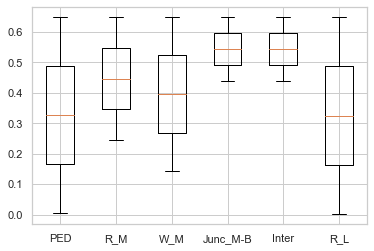

In [357]:
data1 = df_scaled[['PEDCOUNT', 'SEVERITYCODE']].mean()
data2 = df_scaled[['ROADCOND_medium', 'SEVERITYCODE']].mean()
data3 = df_scaled[['WEATHER_medium', 'SEVERITYCODE']].mean()
data4 = df_scaled[['JUNCTIONTYPE_Mid-Block', 'SEVERITYCODE']].mean()
data5 = df_scaled[['atIntersection_Yes', 'SEVERITYCODE']].mean()
data6 = df_scaled[['ROADCOND_low', 'SEVERITYCODE']].mean()

plt.boxplot(( data1, data2, data3, data4, data5, data6), labels=["PED", 'R_M', 'W_M', 'Junc_M-B', 'Inter', 'R_L'])
plt.show()

<h1>2) Methodology</h1>

<h3>3) Results</h3>
<h3>4) Discussion</h3>
<h3>5) Conclusions</h3>